In [7]:
%matplotlib inline
import jsitbad
data = jsitbad.load_js_files('Javascript/*/*')

# Classification de fragments JavaScript comme malveillant ou non, sans les exécuter

Edouard Klein, Sébastien Larinier, Alexandra Toussaint  @ SEKOIA

# Intérêt
* Attirer l'attention de l'analyste sur des fichiers suspects issus d'une collecte
* Filtrer les fichiers passant par un proxy
* S'assurer que son propre code malveillant à l'air sympa (il ne faut donc pas partager cet outil avec tout le monde)

# Challenges
* Théoriquement impossible (Se réduit au *halting problem*, donc incalculable)
* Surtout si on ne peut pas exécuter le code (rappelons nous qu'il est peut-être malveillant)...
* Mais en regardant la source on a quand même une petite idée.
* La minification nous rend la vie difficile

Donc c'est que ce doit être faisable en pratique.

Et ça a déjà été tenté : 
* Peter Likarish, Eunjin Jung, and Insoon Jo. Obfuscated malicious javascript detection using clas- sification techniques. In *4th International Conference on Malicious and Unwanted Software (MALWARE)*, 2009, pages 47–54. IEEE.

Qui est plus un détecteur de code illisible qu'un détecteur de code malveillant.

In [8]:
from pygments import highlight
from pygments.lexers import JavascriptLexer
from pygments.formatters import HtmlFormatter
import re
from IPython.core.display import HTML
def pygment_code(code):
    snippet = highlight(code, JavascriptLexer(),HtmlFormatter(full=True))
    snippet_sub = re.sub(r"""(body \.|class=")""",r"""\1pygm""",snippet)
    return HTML(snippet_sub)

def show_file(fname, start, end):
    js = [x['code'] for x in data if x['name'] == fname][0][start:end]
    return pygment_code(js)

In [10]:
show_file('MooTools-Core-1.5.1.js', 1099, 1900)

In [11]:
show_file('webix.js', 190, 1000)

In [12]:
show_file('2cee1e15cde38907aa427da3e2161c4894d62e084b5adac92dcd9636bf8580e8.out', 0, 500)

In [13]:
X = jsitbad.simple_features([x['code'] for x in data])
X.shape

(61, 7)

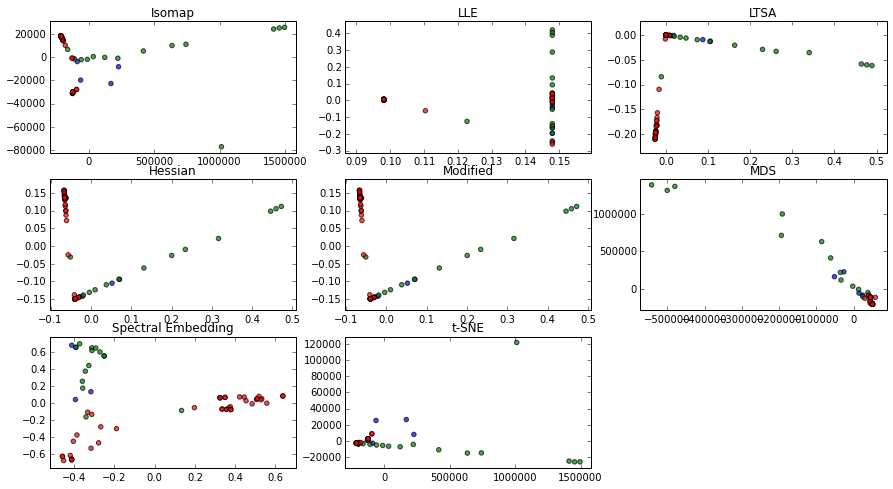

In [15]:
jsitbad.project_on_plane(X, [x['color'] for x in data])

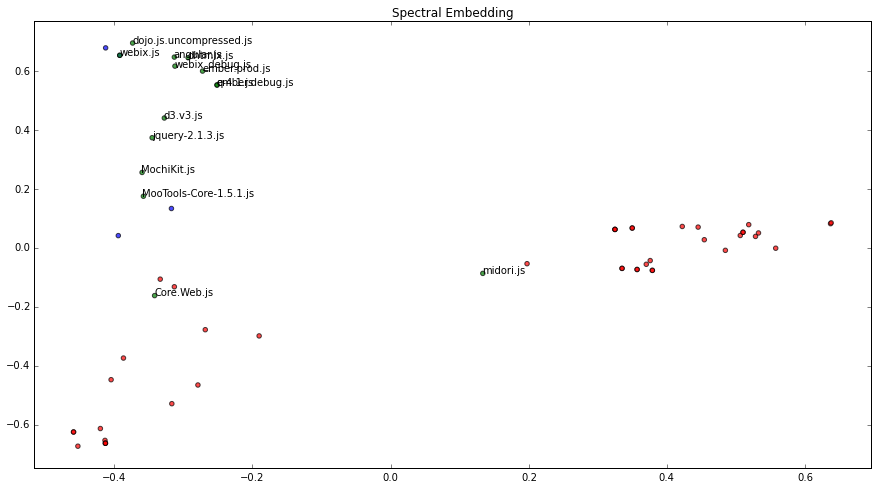

In [17]:
jsitbad.project_on_plane(X, [x['color'] for x in data], unique='Spectral Embedding', 
                         labels=[x['name'] if x['color']=='g' else '' for x in data])

In [25]:
data = jsitbad.load_js_files('hard_js/*')
f = jsitbad.train_from_js_tokens([x['code'] for x in data])
X_tokens = f([x['code'] for x in data])
X_tokens = X_tokens.toarray()
X_tokens.shape

(54, 76)

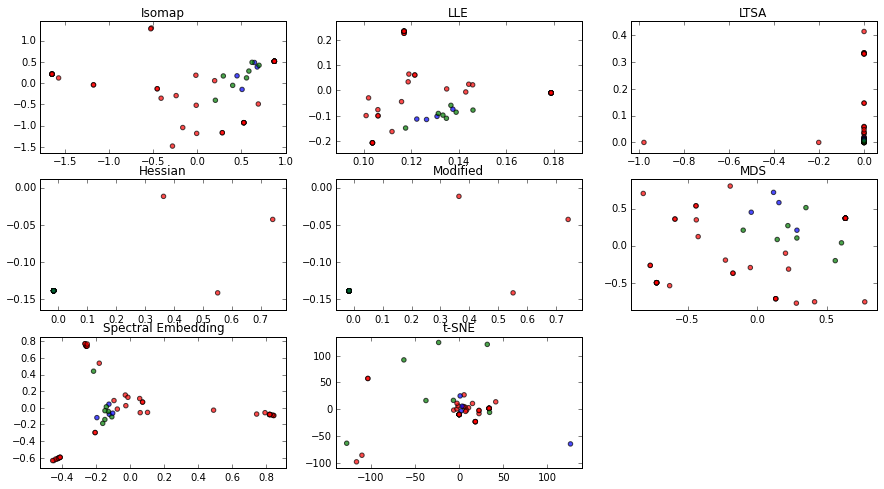

In [26]:
jsitbad.project_on_plane(X_tokens, [x['color'] for x in data])

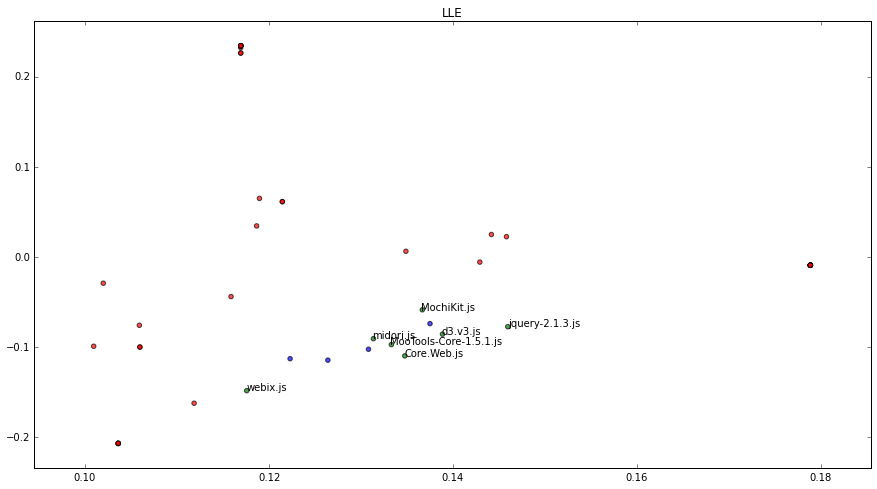

In [27]:
jsitbad.project_on_plane(X_tokens, [x['color'] for x in data], unique='LLE', 
                         labels=[x['name'] if x['color']=='g' else '' for x in data])